In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys

In [ ]:
# installation of related packages
pip install yahoo_fin
pip install yfinance

In [5]:
# Run this block twice !
from datetime import datetime
from datetime import date
from datetime import timedelta

## Parsing Data From News Sources

In [3]:
tech_sector=pd.read_excel('Technology Sector.xlsx')

In [4]:
tech_sector2=tech_sector[['Ticker','Name']]

In [5]:
tech_sector2

,Ticker,Name
0,AAPL,Apple Inc.
1,MSFT,Microsoft Corporation
2,NVDA,NVIDIA Corporation
3,TSM,Taiwan Semiconductor Manufacturing Company Lim...
4,ASML,ASML Holding N.V.
5,CTSH,Cognizant Technology Solutions Corporation
6,AVGO,Broadcom Inc.
7,CSCO,"Cisco Systems, Inc."
8,ORCL,Oracle Corporation
9,ADBE,Adobe Inc.


In [7]:
def check_exists_by_xpath(xpath):
    try:
        browser.find_element_by_xpath(xpath)
    except NoSuchElementException:
        return False
    return True

In [8]:
year_range=['2019','2020','2021','2022']

In [9]:
# Initiating Chrome driver
path = 'chromedriver'

browser = webdriver.Chrome(path)

barrons = 'https://www.barrons.com/search?query=&isToggleOn=true&operator=AND&sort=date-desc&duration=1y&source=barrons%2Cbarronsblog%2Cbarronsvideos%2Cbarronswebstory&quoteQuery=nvda'

# open Barron's

browser.get(barrons)

In [10]:
# loggin in
browser.find_element_by_xpath('//a[@class="BarronsTheme--navbar-item--3nZlzlb6 BarronsTheme--navbar-link--3t8_-C3G BarronsTheme--sign-item--37HGN7sO "]').click()
time.sleep(2)
browser.find_element_by_xpath('//input[@class="username"]').send_keys('12wangjiahao@gmail.com')
time.sleep(1)
browser.find_element_by_xpath('//button[@class="solid-button continue-submit new-design"]').click()
time.sleep(2)
browser.find_element_by_xpath('//*[@id="password-login-password"]').send_keys('Steven19971201!')
browser.find_element_by_xpath('//*[@id="password-login"]/div/form/div/div[5]/div[1]/button').click()

C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/3695689910.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath('//a[@class="BarronsTheme--navbar-item--3nZlzlb6 BarronsTheme--navbar-link--3t8_-C3G BarronsTheme--sign-item--37HGN7sO "]').click()
C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/3695689910.py:4: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath('//input[@class="username"]').send_keys('12wangjiahao@gmail.com')
C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/3695689910.py:6: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath('//button[@class="solid-button continue-submit new-design"]').click()
C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/3695689910.py:8: DeprecationWarning: find_el

In [13]:

# initiating empty lists and dictionaries


# input searching values
see_more = '//*[@id="root"]/div/div/div/div[2]/div/div/div[5]/div/a[2]'

barron_name_input = '//input[@class="BarronsTheme--barrons-search-input--3dKl-YZJ "]'

companies = tech # adjust company list position if interrupted

date_list=tech_sector2['Ticker']

# go through each company in the list
for n in companies:
    article_links=[]
    contents=[]
    # clear search input
    current=browser.current_url
    for i in range(30):
        browser.find_element_by_xpath(barron_name_input).send_keys(Keys.BACKSPACE)
    time.sleep(1)
    
    # input company ticker
    try:
        browser.find_element_by_xpath(barron_name_input).send_keys(n[0])
        time.sleep(0.3)
        browser.find_element_by_xpath(barron_name_input).send_keys(n[1])
        time.sleep(0.3)
        browser.find_element_by_xpath(barron_name_input).send_keys(n[2])
        time.sleep(0.3)
        browser.find_element_by_xpath(barron_name_input).send_keys(n[3])
        time.sleep(0.3)
        browser.find_element_by_xpath(barron_name_input).send_keys(n[4])

    except:
        pass
    # enter company's page
    time.sleep(5)
    browser.find_elements_by_xpath('//a[@class="BarronsTheme--quote-link---vecH2Xu "] ')[0].click()

    time.sleep(0.7)

    # loop while the date is after 2019
    time.sleep(0.5)
    # scroll down
    browser.execute_script("window.scrollTo(0, 1200)")
    time.sleep(0.5)
    browser.find_element_by_xpath('//div[@class="NewsTable__Table-sc-1iia0k8-2 bErLxe"]').location_once_scrolled_into_view

    time.sleep(0.5)
    # show more in news table
    scr1 = browser.find_element_by_xpath('//div[@class="NewsTable__Table-sc-1iia0k8-2 bErLxe"]')

    z = 0
    # check if the last article within the current list is within our year range
    while z ==0 :
        page_source = browser.page_source
        soup = BeautifulSoup(page_source, 'lxml')
        articles = soup.find_all('div', class_='NewsTable__News-sc-1iia0k8-4 dcFwVA')
        time.sleep(1)
        if articles[-1].find('span').get_text().split('.',1)[1].replace(' ', ',').split(',')[3] in year_range:
            browser.execute_script("arguments[0].scrollTop = arguments[0].scrollHeight", scr1)
            time.sleep(1)
            if check_exists_by_xpath('//button[@class="ViewMore__Button-sc-1r4ashd-0 gkpnGP"]'):
                browser.find_element_by_xpath('//button[@class="ViewMore__Button-sc-1r4ashd-0 gkpnGP"]').click()
                time.sleep(1)
            else:
                print("2019-2022 covered")
                z=1
                
        else:
            print("2019-2022 covered")
            z=1

    # loop over each articles
    co = 0
    while co==0:
        try:
            for a in range(len(contents), len(articles)):
                # take date string
                date_time=articles[a].find('span').get_text()

                # separate them in to items
                month = date_time.split('.',1)[0]
                day = date_time.split('.',1)[1].replace(' ', ',').split(',')[1]
                year =  date_time.split('.',1)[1].replace(' ', ',').split(',')[3]

                date_string = month+' ' + day + ' ' + year
                if year in year_range:
                    # change it into datetime type item
                    d = datetime.strptime(date_string,'%b %d %Y')

                    #find article link
                    link = articles[a].find('a',class_='NewsTable__NewsTitle-sc-1iia0k8-6 jRCFif').get('href')
                    time.sleep(0.6)
                    #save article link
                    article_links.append(link)

                    #open article
                    browser.get(link)
                    time.sleep(0.8)
                    #set page source
                    page_source = browser.page_source
                    soup = BeautifulSoup(page_source, 'lxml')

                    # Barron's
                    if check_exists_by_xpath('//article[@class="article"]'):
                        # parse article content
                        time.sleep(0.7)
                        content = soup.find('article', class_='article').get_text(strip=True)
                        time.sleep(0.6)
                         # append name, time, content to contents list
                        contents.append([n, d, content])

                    # Market Watch
                    elif check_exists_by_xpath('//div[@class="article__body article-wrap at16-col16 barrons-article-wrap"]'):
                        time.sleep(0.8)
                        content = soup.find('div',class_='article__body article-wrap at16-col16 barrons-article-wrap').get_text(strip=True)
                        contents.append([n, d, content])

                    elif check_exists_by_xpath('//div[@class="column at8-col8 at12-col7 at16-col9 at16-offset1"]'):
                        content = soup.find('div',class_='column at8-col8 at12-col7 at16-col9 at16-offset1').get_text()
                        contents.append([n, d, content])

                    else:
                        pass
                    print(len(contents))
                else:
                    print('complete 2019-2022')
                time.sleep(0.6)
            co=1
        except:
            print('interrupted, start from the last index position')
            print(len(contents))
            co=0
    time.sleep(0.6)

    dict1={'Company':[],'Datetime':[],'Content':[]}
    for x in contents:
        dict1['Company'].append(x[0])
        dict1['Datetime'].append(x[1])
        dict1['Content'].append(x[2])
    df=pd.DataFrame(dict1)
    file_name = n +'_news.csv'
    df.to_csv(file_name)
    
    browser.get(current)
    time.sleep(5)

C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/33779146.py:20: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath(barron_name_input).send_keys(Keys.BACKSPACE)
C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/33779146.py:25: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath(barron_name_input).send_keys(n[0])
C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/33779146.py:27: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath(barron_name_input).send_keys(n[1])
C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/33779146.py:29: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  browser.find_element_by_xpath(barron_name_input).send_keys(n[2])
C:

2019-2022 covered
1
2
3
3
interrupted, start from the last index position
3
3
4
5
6
7
8
9
9
10
11
12
13
14
15
15
16
17
18
19
interrupted, start from the last index position
19
20
21
22
23
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
interrupted, start from the last index position
65
66
67
68
69
70
71
72
73
74
75
76
interrupted, start from the last index position
76
77
78
interrupted, start from the last index position
78
interrupted, start from the last index position
78
79
80
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022
complete 2019-2022


## Data Structuring, Cleaning, and Processing

In [14]:
from yahoo_fin.stock_info import *

In [15]:
import yfinance as yf

In [33]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [17]:
pip install requests_html

Note: you may need to restart the kernel to use updated packages.


In [20]:
start_date=datetime.strptime('01 01 2019','%m %d %Y')
end_date = datetime.strptime('01 01 2022', '%m %d %Y')

In [21]:
# loading data according to ticker lists
def load_data(tickers_list):
    df = pd.read_csv(tickers_list[0]+'_news.csv')
    
    # concatnate multiple news documents following the existing dataframe
    for i in range(1,len(tickers_list)):
        data = pd.read_csv(tickers_list[i]+'_news.csv')
        df= df.append(data)

    # sort alphabetically by company name
    df2 = df.sort_values(by='Company')
    
    # cleanning up unnecessary inforamtion
    df2.reset_index(inplace=True)
    df2.drop(columns=['index','Unnamed: 0'], inplace=True)
    
    # changing string date to datetime form
    for i in range(0,len(df2['Datetime'])):
        df2['Datetime'][i] = datetime.strptime(df2['Datetime'][i], '%Y-%m-%d').date()
        df2['Company'][i] = df2['Company'][i].replace(' ','')
    return df2

In [48]:
def earnings_target_date(tickers_list):
    earn_dict = {}
    for t in tickers_list:
        date_list=[]
        target_datelist = []
        earn_hist = get_earnings_history(t)
        print(t)
        for d in earn_hist:
            e_date=d['startdatetime'].split('T')
            e_date_items = e_date[0]
            earnings_timestr = e_date[1].split('.')[0]
            earnings_datestr = e_date_items +' ' + earnings_timestr
            earnings_datetime=datetime.strptime(earnings_datestr,'%Y-%m-%d %H:%M:%S')
            if earnings_datetime > start_date and earnings_datetime < end_date:
                date_list.append(earnings_datetime.date())
                if earnings_datetime.weekday() < 4:
                    if earnings_datetime.hour >= 16:
                        target_datelist.append(earnings_datetime.date() + timedelta(days=1))
                    else:
                        target_datelist.append(earnings_datetime.date())
                elif earnings_datetime.weekday() == 4:
                    if earnings_datetime.hour >= 16:
                        target_datelist.append(earnings_datetime.date() + timedelta(days=3))
                    else:
                        target_datelist.append(earnings_datetime.date())
                elif earnings_datetime.weekday() == 5:
                    target_datelist.append(earnings_datetime.date() + timedelta(days=2))
                else:
                    target_datelist.append(earnings_datetime.date() + timedelta(days=1))            
            else:
                pass
        date_list.sort()
        target_datelist.sort()
        if t == 'BRKB':
            earn_dict['BRK-B'] = [date_list, target_datelist]
        else:
            earn_dict[t] = [date_list, target_datelist]
    return earn_dict

In [44]:
def t_list_price(ticker_df):
    t_list = [x.replace(' ', '') for x in ticker_df['Ticker']]
    t_list.sort()
    price_data = yf.download(t_list,start_date,end_date)
    open_price = price_data['Open']
    close_price = price_data['Adj Close']
    return t_list, open_price, close_price

In [267]:
def return_df(close_price_df, open_price_df, earnings_dict):
    open_price_df_2 = open_price_df.drop([start_date + timedelta(days=1)])
    return_pct = open_price_df_2.copy()
    for i in range(0, len(open_price_df_2)):
        return_pct.iloc[i] = open_price_df_2.iloc[i] / close_price_df.iloc[i] - 1
    keys=list(earnings_dict.keys())
    df_return_binary={keys[0]:list(return_pct[keys[0]][earnings_dict[keys[0]][1]])}
    for i in range(1,len(keys)):
        df_return_binary[keys[i]] = list(return_pct[keys[i]][earnings_dict[keys[i]][1]])
    for i in keys:
        binary_re =[]
        for x in df_return_binary[i]:
            if x > 0.03:
                binary_re.append(1)
            elif x < 0.03 and x > -0.03:
                binary_re.append(0)
            else:
                binary_re.append(2)
        df_return_binary[i] = [df_return_binary[i],binary_re]   
    return return_pct, df_return_binary

In [270]:
def data_aggregation(df, t_list, date_dict, return_class):
    company=[]
    content_docs=[]
    dates=[]
    class_list=[]
    pct_list=[]
    ng=[]
    ps=[]
    unc=[]
    liti=[]
    cons=[]
    for c in t_list:
        company_info = df[df['Company'] == c]
        for date in range(0,len(date_dict[c][0])):
            q_content = []
            if date == 0:
                y = company_info[company_info['Datetime'] < date_dict[c][0][date]]
                for i in range(0,len(y)):
                    q_content.append(y['Content'].iloc[i])
                q_content_doc = '.  '.join(q_content)
                content_docs.append(q_content_doc)
                dates.append(date_dict[c][0][date])
                ng.append(y['Negative'].sum() / len(y))
                ps.append(y['Positive'].sum() / len(y))
                unc.append(y['Uncertainty'].sum() / len(y))
                liti.append(y['Litigious'].sum() / len(y))
                cons.append(y['Constraining'].sum() / len(y))
            else:
                y = company_info[(company_info['Datetime'] < date_dict[c][0][date]) & (company_info['Datetime'] > date_dict[c][0][date-1])]
                for i in range(0,len(y)):
                    q_content.append(y['Content'].iloc[i])
                q_content_doc = '.  '.join(q_content)
                content_docs.append(q_content_doc)
                dates.append(date_dict[c][0][date])
                ng.append(y['Negative'].sum() / len(y))
                ps.append(y['Positive'].sum() / len(y))
                unc.append(y['Uncertainty'].sum() / len(y))
                liti.append(y['Litigious'].sum() / len(y))
                cons.append(y['Constraining'].sum() / len(y))                
            company.append(c)
        class_list += return_class[c][1]
        pct_list += return_class[c][0]
    agg_df = pd.DataFrame({'Company':company, 'Content': content_docs, 'Datetime':dates,
                          'Negative':ng, 'Positive':ps, 'Uncertainty':unc, 'Litigious':liti,
                          'Constraining':cons, 'Return_class':class_list, 'Return_pct':pct_list})
    return agg_df

In [759]:
category_list = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining']
stopwords_list = stopwords.words('english')
LM_dict = pd.read_csv('Loughran-McDonald_MasterDictionary_1993-2021.csv')
def structure_processing(ticker_dataframe):
    df = load_data(ticker_dataframe['Ticker'])
    ti_list, open_price, close_price = t_list_price(ticker_dataframe)
    ea_dict = earnings_target_date(ti_list)
    re_pct, re_class = return_df(close_price, open_price, ea_dict)
    df2 = word_category_counts(df, category_list, stopwords_list)
    structured_df = data_aggregation(df2, ti_list, ea_dict, re_class)
    return structured_df

In [27]:

def word_category_counts(news_df, category_list, stopwords_list): # takes a while to run this one
    news_df2 = news_df.copy()
    news_df2['Content'] = news_df['Content'].apply(lambda x: word_tokenize(x))
    for x in range(0, len(news_df2['Content'])):
        news_df2['Content'][x] = [w.upper() for w in news_df2['Content'][x] if (w.isalpha()) & (w not in stopwords_list)]
    neg=[]
    pos=[]
    uncert=[]
    liti=[]
    cons=[]
    LM_dict.index = LM_dict['Word']
    news_df2[category_list] = 0
    words=list(LM_dict.index.values)
    for i in range(0,len(news_df2['Content'])):
        w = [n for n in news_df2['Content'][i] if n in words]
        neg.append(LM_dict.loc[w][LM_dict.loc[w][category_list[0]] > 0][category_list[0]].count())
        pos.append(LM_dict.loc[w][LM_dict.loc[w][category_list[1]] > 0][category_list[1]].count())
        uncert.append(LM_dict.loc[w][LM_dict.loc[w][category_list[2]] > 0][category_list[2]].count())
        liti.append(LM_dict.loc[w][LM_dict.loc[w][category_list[3]] > 0][category_list[3]].count())
        cons.append(LM_dict.loc[w][LM_dict.loc[w][category_list[4]] > 0][category_list[4]].count())
        print(len(neg))
    news_df2[category_list[0]] = neg
    news_df2[category_list[1]] = pos
    news_df2[category_list[2]] = uncert
    news_df2[category_list[3]] = liti
    news_df2[category_list[4]] = cons
    
    news_df2['TermCounts'] = news_df2['Content'].apply(lambda x: len(x))
    news_df2[category_list[0]] = news_df2[category_list[0]] / news_df2['TermCounts']
    news_df2[category_list[1]] = news_df2[category_list[1]] / news_df2['TermCounts']
    news_df2[category_list[2]] = news_df2[category_list[2]] / news_df2['TermCounts']
    news_df2[category_list[3]] = news_df2[category_list[3]] / news_df2['TermCounts']
    news_df2[category_list[4]] = news_df2[category_list[4]] / news_df2['TermCounts']
    news_df2['Content'] = news_df['Content']
    return news_df2

In [867]:
tech_sector= pd.read_excel('Technology Sector.xlsx')
health_sector= pd.read_excel('Health Care Sector.xlsx')
consumer_sector = pd.read_excel('Consumer Discretionary Sector.xlsx')
comm_sector = pd.read_excel('Communication Services Sector.xlsx')
finan_sector = pd.read_excel('Financial Sector.xlsx')

In [ ]:
# needs un-processed raw news files to run this line
# transform and structure the raw data
df3 = structure_processing(health_sector)

In [868]:
# filtering rows with no content and reset index, then save the cleaned data set
df4 = df3[df3['Content']!='']
df4.reset_index(inplace=True)
df4.drop(columns='index',inplace=True)
df4.to_csv('Financial Services Sector Data.csv')

## Data Exploration

In [1788]:
# import structured data set
df_consumer = pd.read_csv('Consumer Discretionary Sector Data.csv')
df_financial = pd.read_csv('Financial Services Sector Data.csv')
df_commu = pd.read_csv('Communication Services Sector Data.csv')
df_health = pd.read_csv('Healthcare Data.csv')
df_tech = pd.read_csv('Technology Sector data.csv')

In [1789]:
# Add column sector
df_consumer['Sector'] = 'Consumer Discretionary'
df_financial['Sector'] = 'Financial Services'
df_commu['Sector'] = 'Communication Services'
df_health['Sector'] = 'Healthcare'
df_tech['Sector'] = 'Techology'

In [1790]:
# change the target variable to category
df_consumer['Return_class'] = df_consumer['Return_class'].astype('category')
df_financial['Return_class'] = df_financial['Return_class'].astype('category')
df_commu['Return_class'] = df_commu['Return_class'].astype('category')
df_health['Return_class'] = df_health['Return_class'].astype('category')
df_tech['Return_class'] = df_tech['Return_class'].astype('category')

In [1791]:
# aggregate all sector together
df_all_sector = pd.concat([df_consumer, df_financial, df_commu, df_health, df_tech])
df_all_sector = df_all_sector.reset_index().drop(columns=['index','Unnamed: 0'])

In [1276]:
# creating a seperate dataframe for analytical graphing
analytics_col = ['Company','Sector','Negative','Positive','Uncertainty', 'Litigious','Constraining','Return_class','Datetime']
df_analytics = pd.melt(df_all_sector[analytics_col], id_vars = ['Company','Return_class','Sector','Datetime'], var_name = 'var', value_name = 'value')

In [1274]:
df_analytics

,Company,Return_class,Sector,Datetime,var,value
0,AMZN,2,Consumer Discretionary,2019-01-31,Negative,0.021296
1,AMZN,0,Consumer Discretionary,2019-04-25,Negative,0.022809
2,AMZN,0,Consumer Discretionary,2019-07-25,Negative,0.023973
3,AMZN,2,Consumer Discretionary,2019-10-24,Negative,0.022984
4,AMZN,1,Consumer Discretionary,2020-01-30,Negative,0.019518
...,...,...,...,...,...,...
8347,TSM,0,Techology,2020-10-15,Return_pct,0.009992
8348,TSM,1,Techology,2021-01-14,Return_pct,0.037150
8349,TSM,0,Techology,2021-04-15,Return_pct,0.024248
8350,TSM,0,Techology,2021-07-15,Return_pct,-0.021654


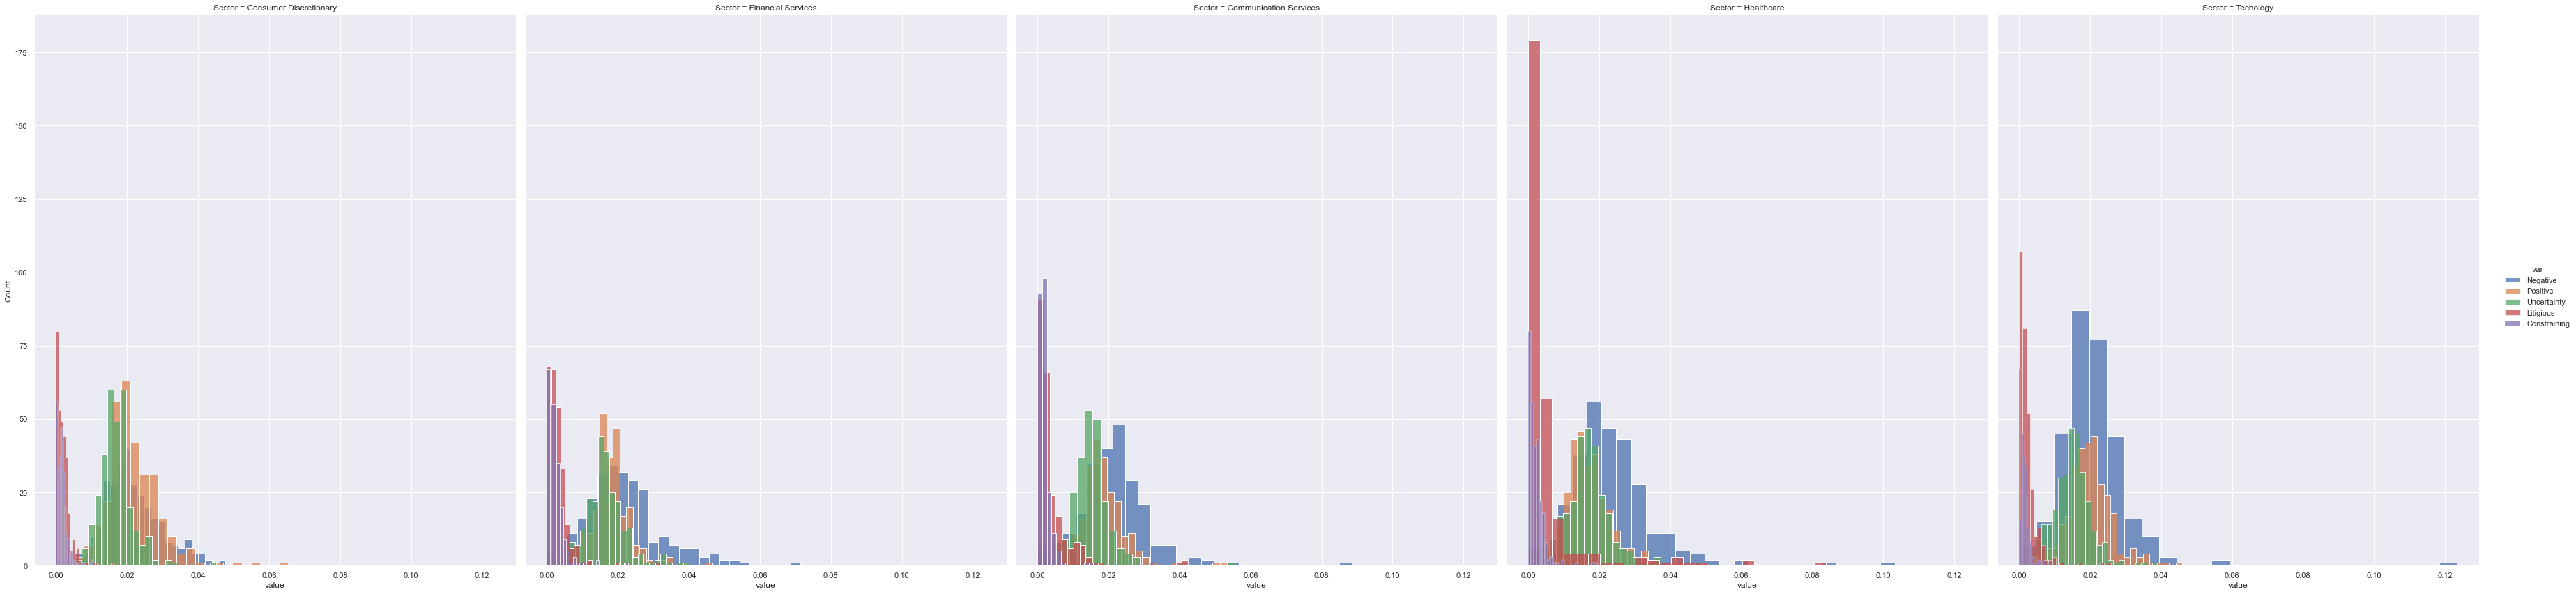

In [993]:
#  sentiment distributions
g = sns.FacetGrid(df_analytics, col="Sector", hue='var', height=12, aspect=10/12, col_wrap=5)
g.map(sns.histplot, 'value',bins=25)
g.add_legend()
plt.savefig('sector_sentiment distribution.png')

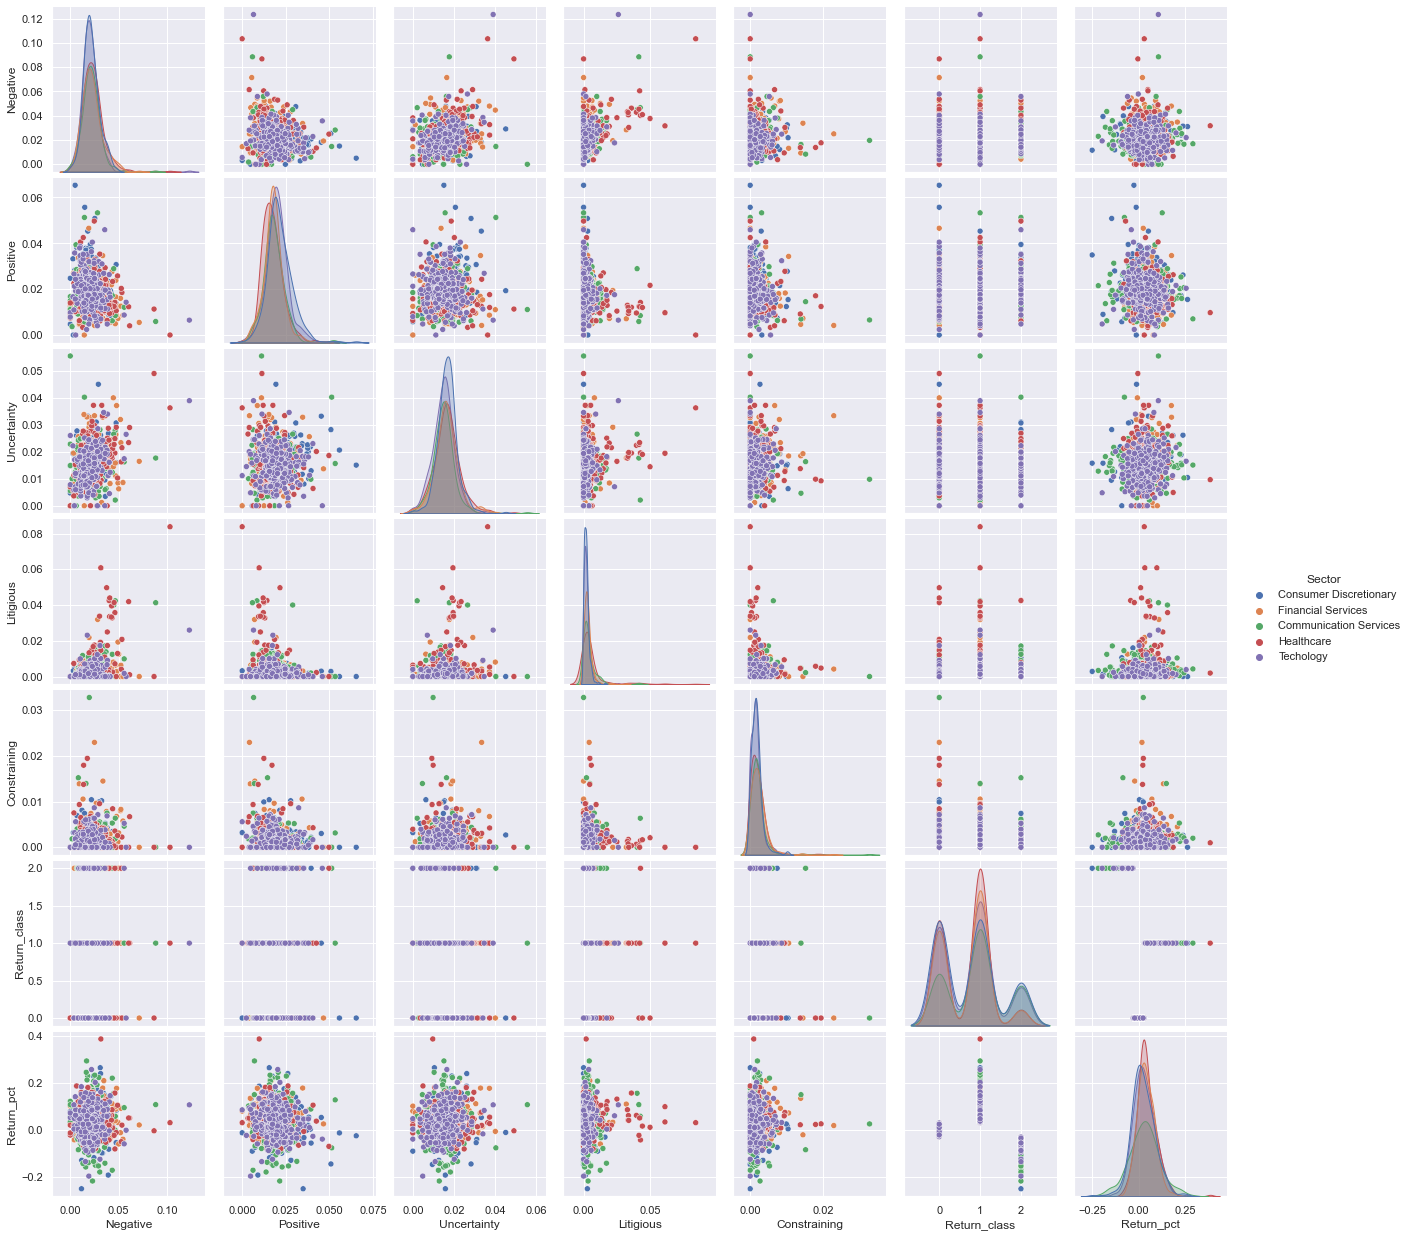

In [1268]:
# pair plot
sns.pairplot(df_all_sector[analytics_col], hue='Sector')



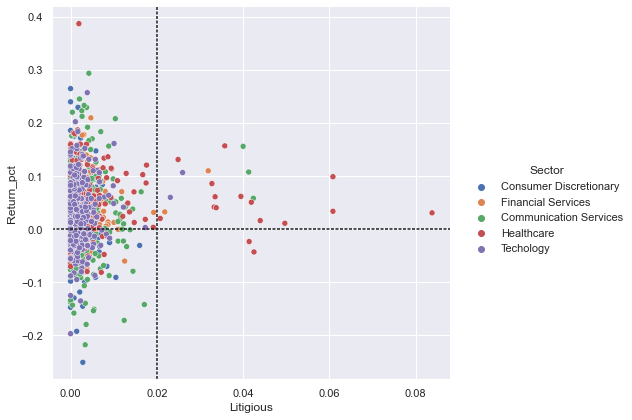

In [1546]:
# scatter plot: return percentage against litigious score
g2 = sns.relplot(data=df_all_sector, x='Litigious', y='Return_pct', kind='scatter',hue='Sector',height=6, aspect=1.1)
g2.map(plt.axhline, y=0, color=".1",dashes=(2,1),zorder=2)
g2.map(plt.axvline, x=0.02, color=".1",dashes=(2,1),zorder=2)

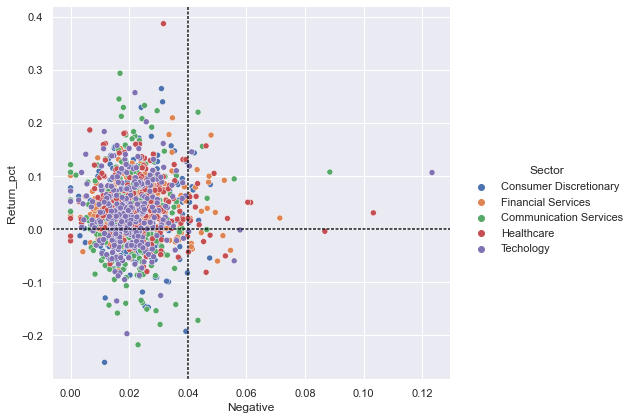

In [1547]:
# scatter plot: return percentage against negative score
g3 = sns.relplot(data=df_all_sector, x='Negative', y='Return_pct', kind='scatter',hue='Sector',height=6, aspect=1.1)
g3.map(plt.axhline, y=0, color=".1",dashes=(2,1),zorder=2)
g3.map(plt.axvline, x=0.04, color=".1",dashes=(2,1),zorder=2)

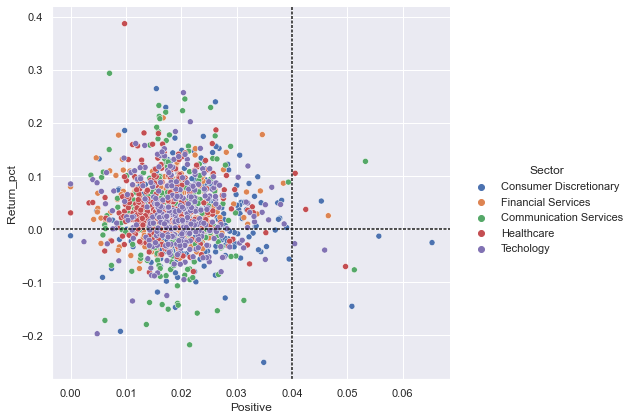

In [1548]:
# # scatter plot: return percentage against positive score
g4 = sns.relplot(data=df_all_sector, x='Positive', y='Return_pct', kind='scatter',hue='Sector',height=6, aspect=1.1)
g4.map(plt.axhline, y=0, color=".1",dashes=(2,1),zorder=2)
g4.map(plt.axvline, x=0.04, color=".1",dashes=(2,1),zorder=2)

In [1655]:
# examine the term frequency
from nltk import FreqDist
freq = FreqDist(terms)
sorted_freq = sorted(freq.items(), key = lambda k:k[1], reverse = True)

In [1662]:
freq_2 = FreqDist(terms_2)
sorted_freq_2 = sorted(freq_2.items(), key = lambda k:k[1], reverse = True)

## Textual Data Pre-processing


In [1028]:
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [1029]:
# initializing stop words list and lemmatization
sw = stopwords.words('english')
lemma = WordNetLemmatizer()

In [1411]:
# function for tokenization, lemmatization, and stopwords removal
def token_lemma_stopwords(df):
    df2 = df.copy()
    df2['Content'] = df2['Content'].apply(lambda x: word_tokenize(x))
    for x in range(0, len(df2['Content'])):
        df2['Content'][x] = [lemma.lemmatize(w.lower()) for w in df2['Content'][x] if (w.isalpha()) & (w not in sw)]
    return df2

In [1686]:
# function for part-of-speech tagging
def POS_approach(df):
    df2 = df.copy()
    df2['Content'] = df2['Content'].apply(lambda x: word_tokenize(x))
    df2['Content'] = df2['Content'].apply(lambda x: nltk.pos_tag(x))
    for x in range(0,len(df2)):
        df2['Content'][x] = [word for (word,tag) in df2['Content'][x] if tag in ['NN', 'NNS']]
    return df2

In [1370]:
# use token_lemma_stopwords on the prepared data sets
df_consumer2 = token_lemma_stopwords(df_consumer)
df_financial2 = token_lemma_stopwords(df_financial)
df_tech2 = token_lemma_stopwords(df_tech)
df_commu2 = token_lemma_stopwords(df_commu)
df_health2 = token_lemma_stopwords(df_health)
df_all_sector2 = token_lemma_stopwords(df_all_sector)


C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/881151552.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Content'][x] = [lemma.lemmatize(w.lower()) for w in df['Content'][x] if (w.isalpha()) & (w not in sw)]


# Machine Learning Predictions

In [1035]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [1036]:
import gensim
from gensim.models import LdaModel
from gensim import corpora,models
from gensim.models import Phrases

In [1810]:
# Train - test - split, and using TF-IDF vectorizor to transform the textual data

def tfidf_processing(comp_df):
    remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)
    tokenize = lambda x: word_tokenize(x)
    lemmatizer = WordNetLemmatizer()
    lemmtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x ]
   
    comp_df['Content'] = comp_df['Content'].apply(remove_non_alphabets)
    comp_df['Content'] = comp_df['Content'].apply(tokenize)
    comp_df['Content'] = comp_df['Content'].apply(lemmtizer)
    comp_df['Content'] = comp_df['Content'].apply(lambda x: ' '.join(x))
   
    train_corpus, test_corpus, train_labels, test_labels = train_test_split(comp_df[var2],
                                                                            comp_df['Return_class'],test_size=0.2, random_state=2)
    tfidf_vectorizer=TfidfVectorizer(min_df=30, max_df=0.90,max_features=5000,
                                     norm='l2',smooth_idf=True,use_idf=True,ngram_range=(2,2))
    tfidf_train_features = tfidf_vectorizer.fit_transform(train_corpus['Content'])  
    tfidf_test_features = tfidf_vectorizer.transform(test_corpus['Content'])
    count_array_train = tfidf_train_features.toarray()
    df_train = pd.DataFrame(data=count_array_train,columns = tfidf_vectorizer.get_feature_names())
    count_array_test = tfidf_test_features.toarray()
    df_test = pd.DataFrame(data=count_array_test,columns = tfidf_vectorizer.get_feature_names())
    df_train.index = train_corpus.index
    df_train2 = pd.concat([df_train, comp_df.loc[df_train.index][var]], axis=1)
    df_test.index = test_corpus.index
    df_test2 = pd.concat([df_test, comp_df.loc[df_test.index][var]], axis=1)
   
    return df_train2, df_test2, train_labels, test_labels

In [1759]:
# LDA topic modeling on train and test set, matching features with orginal index positions

def topic_model_processing(X_train, X_test):    
    test_lda = X_train['Content'].tolist()
    test_lda = [[token for token in doc if len(token) > 1] for doc in test_lda]
    bigram = Phrases(test_lda, min_count=10)
    for idx in range(len(test_lda)):
        for token in bigram[test_lda[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                test_lda[idx].append(token)
    dictionary = Dictionary(test_lda)
    dictionary.filter_extremes(no_below=10, no_above=0.7)
    corpus = [dictionary.doc2bow(doc) for doc in test_lda]
    
    test_lda2 = X_test['Content'].tolist()
    test_lda2 = [[token for token in doc if len(token) > 1] for doc in test_lda2]
    bigram2 = Phrases(test_lda2, min_count=10)
    for idx in range(len(test_lda2)):
        for token in bigram2[test_lda2[idx]]:
            if '_' in token:
                # Token is a bigram, add to document.
                test_lda2[idx].append(token)
    dictionary2 = Dictionary(test_lda2)
    dictionary2.filter_extremes(no_below=10, no_above=0.7)
    corpus2 = [dictionary2.doc2bow(doc) for doc in test_lda2]
    
    num_topics = 20
    chunksize = 2000
    passes = 20
    iterations = 1000
    eval_every = 1  # Don't evaluate model perplexity, takes too much time.

    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token
    
    lda = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every)
    
    lda.print_topics(num_topics)
    # Generate U Matrix for LDA model
    corpus_lda = lda[corpus] #transform lda model

    #convert corpus_lda to numpy matrix
    U_matrix_lda = gensim.matutils.corpus2dense(corpus_lda,num_terms=num_topics).T

    #write U_matrix into pandas dataframe and output
    U_matrix_lda_df = pd.DataFrame(U_matrix_lda)

    # Generate U Matrix for LDA model
    corpus_lda2 = lda[corpus2] #transform lda model

    #convert corpus_lda to numpy matrix
    U_matrix_lda2 = gensim.matutils.corpus2dense(corpus_lda2,num_terms=num_topics).T

    #write U_matrix into pandas dataframe and output
    U_matrix_lda_df2 = pd.DataFrame(U_matrix_lda2)
    
    U_matrix_lda_df.index = X_train.index
    U_matrix_lda_df2.index = X_test.index
    df_train = pd.concat([X_train[var],U_matrix_lda_df], axis=1)
    df_test = pd.concat([X_test[var],U_matrix_lda_df2], axis=1)
    
    return df_train, df_test, lda

In [1569]:
# fitting various machine learning models, and output the prediciton results in a orgnized dataframe

def ML_models(df_train, y_train, df_test, y_test):
    # Multinomial Naive Bayes
    clf_b = MultinomialNB()
    clf_b.fit(df_train, y_train)
    
    # SVC
    clf_svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    clf_svc.fit(df_train, y_train)
    
    # Gradient Boosting
    clf_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=6, random_state=2)
    clf_gb.fit(df_train,y_train)
    
    # Neural Network
    kfolds=5
    min_hls=1
    max_hls = 12
    min_alpha = 0.001
    max_alpha = 15
    n_alpha=10

    param_grid = {'hidden_layer_sizes': np.arange(min_hls,max_hls), 'alpha': list(np.linspace(min_alpha, max_alpha,num=n_alpha))}
    gridsearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000,random_state=2), param_grid, scoring='accuracy', cv=kfolds, n_jobs=-1)
    gridsearch.fit(df_train,y_train)
    clf_nn = gridsearch.best_estimator_
    
    # Random Forest
    clf_rf= RandomForestClassifier(max_depth=8, random_state=0)
    clf_rf.fit(df_train,y_train)
    
    
    bayes_pred = clf_b.predict(df_test)
    svc_pred = clf_svc.predict(df_test)
    gb_pred = clf_gb.predict(df_test)
    nn_pred = clf_nn.predict(df_test)
    rf_pred = clf_rf.predict(df_test)
    
    # Results
    ac_b = metrics.accuracy_score(y_test, clf_b.predict(df_test))
    ac_svc = metrics.accuracy_score(y_test, clf_svc.predict(df_test))
    ac_gb = metrics.accuracy_score(y_test, clf_gb.predict(df_test))
    ac_nn = metrics.accuracy_score(y_test, clf_nn.predict(df_test))
    ac_rf = metrics.accuracy_score(y_test, clf_rf.predict(df_test))
    ps_b = metrics.precision_score(y_test, clf_b.predict(df_test), average=None)
    ps_svc = metrics.precision_score(y_test, clf_svc.predict(df_test), average=None)
    ps_gb = metrics.precision_score(y_test, clf_gb.predict(df_test), average=None)
    ps_nn = metrics.precision_score(y_test, clf_nn.predict(df_test), average=None)
    ps_rf = metrics.precision_score(y_test, clf_rf.predict(df_test), average=None)
    rc_b = metrics.recall_score(y_test, clf_b.predict(df_test), average=None)
    rc_svc = metrics.recall_score(y_test, clf_svc.predict(df_test), average=None)
    rc_gb = metrics.recall_score(y_test, clf_gb.predict(df_test), average=None)
    rc_nn = metrics.recall_score(y_test, clf_nn.predict(df_test), average=None)
    rc_rf = metrics.recall_score(y_test, clf_rf.predict(df_test), average=None)
    f1_b = metrics.f1_score(y_test, clf_b.predict(df_test), average=None)
    f1_svc = metrics.f1_score(y_test, clf_svc.predict(df_test), average=None)
    f1_gb = metrics.f1_score(y_test, clf_gb.predict(df_test), average=None)
    f1_nn = metrics.f1_score(y_test, clf_nn.predict(df_test), average=None)
    f1_rf = metrics.f1_score(y_test, clf_rf.predict(df_test), average=None)
    
    df_results = pd.DataFrame({'Model':['Multinomial Naive Bayes','Support Vector Classifier','Gradient Boosting','Neural Network','Random Forest'],
               'Accuracy':[ac_b, ac_svc, ac_gb, ac_nn, ac_rf],
              'Precision_0':[ps_b[0], ps_svc[0], ps_gb[0], ps_nn[0], ps_rf[0]],
                            'Precision_1':[ps_b[1], ps_svc[1], ps_gb[1], ps_nn[1], ps_rf[1]],
                            'Precision_2':[ps_b[2], ps_svc[2], ps_gb[2], ps_nn[2], ps_rf[2]],
              'Recall_0': [rc_b[0], rc_svc[0], rc_gb[0], rc_nn[0], rc_rf[0]],
                            'Recall_1': [rc_b[1], rc_svc[1], rc_gb[1], rc_nn[1], rc_rf[1]],
                            'Recall_2': [rc_b[2], rc_svc[2], rc_gb[2], rc_nn[2], rc_rf[2]],
              'F-1_0': [f1_b[0], f1_svc[0], f1_gb[0], f1_nn[0], f1_rf[0]],
                           'F-1_1': [f1_b[1], f1_svc[1], f1_gb[1], f1_nn[1], f1_rf[1]],
                           'F-1_2': [f1_b[2], f1_svc[2], f1_gb[2], f1_nn[2], f1_rf[2]],})
    df_predictions = pd.DataFrame({'Mutinomial Naive Bayes':bayes_pred,'Support Vector Classifier':svc_pred,
                                   'Gradient Boosting':gb_pred,'Neural Network':nn_pred,'Random Forest':rf_pred})
 
    return df_results, df_predictions

In [1567]:
# calculate percentage returns based on the machine learning prediction results according
# to the defined trading strategy, output a dataframe with net asset value

def back_test(original_df, X_test3, best_model_pred):
    best_model_pred.index = X_test3.index
    X_test3['pred'] = best_model_pred
    X_test3['Company']=original_df['Company'].iloc[X_test3.index]
    X_test3['Datetime']=original_df['Datetime'].iloc[X_test3.index]
    X_test3['Return_pct']=original_df['Return_pct'].iloc[X_test3.index]
    X_test3['Datetime'] = X_test3['Datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    X_test3= X_test3.sort_values(by='Datetime')
    X_test3 = X_test3[X_test3['pred'] != 0].reset_index()
    Q1_2019=[]
    Q1_2020=[]
    Q1_2021=[]

    Q2_2019=[]
    Q2_2020=[]
    Q2_2021=[]

    Q3_2019=[]
    Q3_2020=[]
    Q3_2021=[]

    Q4_2019=[]
    Q4_2020=[]
    Q4_2021=[]
    for x in range(0, len(X_test3)):
        if X_test3['Datetime'][x].year == 2019:
            if X_test3['Datetime'][x].month < 4:
                if X_test3['pred'][x] ==1 :
                    Q1_2019.append(X_test3['Return_pct'][x])
                else:
                    Q1_2019.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month < 7 and X_test3['Datetime'][x].month > 4:
                if X_test3['pred'][x] ==1 :
                    Q2_2019.append(X_test3['Return_pct'][x])
                else:
                    Q2_2019.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month < 10 and X_test3['Datetime'][x].month > 7:
                if X_test3['pred'][x] ==1 :
                    Q3_2019.append(X_test3['Return_pct'][x])
                else:
                    Q3_2019.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month > 10:
                if X_test3['pred'][x] ==1 :
                    Q4_2019.append(X_test3['Return_pct'][x])
                else:
                    Q4_2019.append(-X_test3['Return_pct'][x])

        elif X_test3['Datetime'][x].year == 2020:
            if X_test3['Datetime'][x].month < 4:
                if X_test3['pred'][x] ==1 :
                    Q1_2020.append(X_test3['Return_pct'][x])
                else:
                    Q1_2020.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month < 7 and X_test3['Datetime'][x].month > 4:
                if X_test3['pred'][x] ==1 :
                    Q2_2020.append(X_test3['Return_pct'][x])
                else:
                    Q2_2020.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month < 10 and X_test3['Datetime'][x].month > 7:
                if X_test3['pred'][x] ==1 :
                    Q3_2020.append(X_test3['Return_pct'][x])
                else:
                    Q3_2020.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month > 10:
                if X_test3['pred'][x] ==1 :
                    Q4_2020.append(X_test3['Return_pct'][x])
                else:
                    Q4_2020.append(-X_test3['Return_pct'][x])

        elif X_test3['Datetime'][x].year == 2021:
            if X_test3['Datetime'][x].month < 4:
                if X_test3['pred'][x] ==1 :
                    Q1_2021.append(X_test3['Return_pct'][x])
                else:
                    Q1_2021.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month < 7 and X_test3['Datetime'][x].month > 4:
                if X_test3['pred'][x] ==1 :
                    Q2_2021.append(X_test3['Return_pct'][x])
                else:
                    Q2_2021.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month < 10 and X_test3['Datetime'][x].month > 7:
                if X_test3['pred'][x] ==1 :
                    Q3_2021.append(X_test3['Return_pct'][x])
                else:
                    Q3_2021.append(-X_test3['Return_pct'][x])
            if X_test3['Datetime'][x].month > 10:
                if X_test3['pred'][x] ==1 :
                    Q4_2021.append(X_test3['Return_pct'][x])
                else:
                    Q4_2021.append(-X_test3['Return_pct'][x])
    if len(Q1_2019) == 0:
        Q1_2019 = 0
    if len(Q2_2019) == 0:
        Q2_2019 = 0
    if len(Q3_2019) == 0:
        Q3_2019 = 0
    if len(Q4_2019) == 0:
        Q4_2019 = 0
    if len(Q1_2020) == 0:
        Q1_2020 = 0
    if len(Q2_2020) == 0:
        Q2_2020 = 0
    if len(Q3_2020) == 0:
        Q3_2020 = 0
    if len(Q4_2020) == 0:
        Q4_2020 = 0
    if len(Q1_2021) == 0:
        Q1_2021 = 0
    if len(Q2_2021) == 0:
        Q2_2021 = 0
    if len(Q3_2021) == 0:
        Q3_2021 = 0
    if len(Q4_2021) == 0:
        Q4_2021 = 0

    compound_total = (1+np.mean(Q1_2019)) * (1+np.mean(Q2_2019)) *(1+np.mean(Q3_2019))*(1+np.mean(Q4_2019))*(1+np.mean(Q1_2020))*(1+np.mean(Q2_2020))*(1+np.mean(Q3_2020))*(1+np.mean(Q4_2020))*(1+np.mean(Q1_2021))*(1+np.mean(Q2_2021))*(1+np.mean(Q3_2021))*(1+np.mean(Q4_2021))

    return compound_total


In [1039]:
# specifing 2 groups of columns for dataframe subsetting 
var = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining']
var2 = ['Content','Negative', 'Positive', 'Uncertainty', 'Litigious', 'Constraining']

# TF-IDF Results

In [1811]:
# TF-IDF processing and train test split for each sector and their aggregation
X_train_fin_idf, X_test_fin_idf, y_train_fin_idf, y_test_fin_idf = tfidf_processing(df_financial)
X_train_consum_idf, X_test_consum_idf, y_train_consum_idf, y_test_consum_idf = tfidf_processing(df_consumer)
X_train_commu_idf, X_test_commu_idf, y_train_commu_idf, y_test_commu_idf = tfidf_processing(df_commu)
X_train_tech_idf, X_test_tech_idf, y_train_tech_idf, y_test_tech_idf = tfidf_processing(df_tech)
X_train_hth_idf, X_test_hth_idf, y_train_hth_idf, y_test_hth_idf = tfidf_processing(df_health)
X_train_all_idf, X_test_all_idf, y_train_all_idf, y_test_all_idf = tfidf_processing(df_all_sector)

In [1812]:
# implementing machine learning models and gettin the prediction results
df_pred_score_fin_idf, df_pred_fin_idf= ML_models(X_train_fin_idf, y_train_fin_idf, X_test_fin_idf, y_test_fin_idf)
df_pred_score_consum_idf, df_pred_consum_idf= ML_models(X_train_consum_idf, y_train_consum_idf, X_test_consum_idf, y_test_consum_idf)
df_pred_score_commu_idf, df_pred_commu_idf= ML_models(X_train_commu_idf, y_train_commu_idf, X_test_commu_idf, y_test_commu_idf)
df_pred_score_tech_idf, df_pred_tech_idf= ML_models(X_train_tech_idf, y_train_tech_idf, X_test_tech_idf, y_test_tech_idf)
df_pred_score_hth_idf, df_pred_hth_idf= ML_models(X_train_hth_idf, y_train_hth_idf, X_test_hth_idf, y_test_hth_idf)
df_pred_score_all_idf, df_pred_all_idf= ML_models(X_train_all_idf, y_train_all_idf, X_test_all_idf, y_test_all_idf)

C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

In [1818]:
# sample output
df_pred_score_tech_idf

,Model,Accuracy,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,F-1_0,F-1_1,F-1_2
0,Multinomial Naive Bayes,0.483871,0.423077,0.527778,0.0,0.478261,0.655172,0.0,0.448980,0.584615,0.0
1,Support Vector Classifier,0.483871,0.388889,0.522727,0.0,0.304348,0.793103,0.0,0.341463,0.630137,0.0
2,Gradient Boosting,0.467742,0.392857,0.529412,0.0,0.478261,0.620690,0.0,0.431373,0.571429,0.0
3,Neural Network,0.483871,0.416667,0.576923,0.0,0.652174,0.517241,0.0,0.508475,0.545455,0.0
4,Random Forest,0.548387,0.478261,0.589744,0.0,0.478261,0.793103,0.0,0.478261,0.676471,0.0


In [ ]:
# create a list that contains the names of the models used

models = list(df_pred_fin.columns.values)

In [1816]:
# calculation for each group of predictions

financial_trade_idf = []
for m in models:
    financial_trade_idf.append(back_test(df_financial, X_test_fin_idf, df_pred_fin_idf[m]))
consumer_trade_idf = []
for m in models:
    consumer_trade_idf.append(back_test(df_consumer, X_test_consum_idf, df_pred_consum_idf[m]))
commu_trade_idf = []
for m in models:
    commu_trade_idf.append(back_test(df_commu, X_test_commu_idf, df_pred_commu_idf[m]))
tech_trade_idf = []
for m in models:
    tech_trade_idf.append(back_test(df_tech, X_test_tech_idf, df_pred_tech_idf[m]))
health_trade_idf = []
for m in models:
    health_trade_idf.append(back_test(df_health, X_test_hth_idf, df_pred_hth_idf[m]))
all_trade_idf = []
for m in models:
    all_trade_idf.append(back_test(df_all_sector, X_test_all_idf, df_pred_all_idf[m]))
    
trade_df_idf = pd.DataFrame({'Model':models, 'Financial Sector':financial_trade_idf,
                       'Consumer Discretionary Sector':consumer_trade_idf, 'Communication Services Sector':commu_trade_idf,
                       'Technology Sector': tech_trade_idf, 'Healthcare Sector':health_trade_idf,
                       'All Sectors': all_trade_idf})

In [1817]:
# profit return output
trade_df_idf

,Model,Financial Sector,Consumer Discretionary Sector,Communication Services Sector,Technology Sector,Healthcare Sector,All Sectors
0,Mutinomial Naive Bayes,1.170845,1.266268,1.314606,1.528137,1.342067,1.335762
1,Support Vector Classifier,1.170845,1.240949,1.314606,1.473265,1.350739,1.385623
2,Gradient Boosting,1.111784,1.143390,1.233757,1.200746,1.543044,1.258859
3,Neural Network,1.181221,1.326000,1.314606,1.398861,1.409360,1.421570
4,Random Forest,1.153450,1.108333,1.292347,1.489113,1.318685,1.344735


## Bag-of-words With lemmatization and stopwords removal, Topic Model Results


In [1760]:
# Tokenization, lemmatization, and stopwords removal
df_consumer2 = token_lemma_stopwords(df_consumer)
df_financial2 = token_lemma_stopwords(df_financial)
df_tech2 = token_lemma_stopwords(df_tech)
df_commu2 = token_lemma_stopwords(df_commu)
df_health2 = token_lemma_stopwords(df_health)
df_all_sector2 = token_lemma_stopwords(df_all_sector)

C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/2004268424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Content'][x] = [lemma.lemmatize(w.lower()) for w in df2['Content'][x] if (w.isalpha()) & (w not in sw)]


In [1763]:
# Train Test Split
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(df_financial2[var2],df_financial2['Return_class'],
                                                    test_size = 0.2, random_state=10)
X_train_consum, X_test_consum, y_train_consum, y_test_consum = train_test_split(df_consumer2[var2],df_consumer2['Return_class'],
                                                    test_size = 0.2, random_state=10)
X_train_commu, X_test_commu, y_train_commu, y_test_commu = train_test_split(df_commu2[var2],df_commu2['Return_class'],
                                                    test_size = 0.2, random_state=10)
X_train_tech, X_test_tech, y_train_tech, y_test_tech = train_test_split(df_tech2[var2],df_tech2['Return_class'],
                                                    test_size = 0.2, random_state=10)
X_train_hth, X_test_hth, y_train_hth, y_test_hth = train_test_split(df_health2[var2],df_health2['Return_class'],
                                                    test_size = 0.2, random_state=10)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(df_all_sector2[var2],df_all_sector2['Return_class'],
                                                    test_size = 0.2, random_state=10)

In [1764]:
# train and transform textual data to topics
df_train_fin, df_test_fin, lda_fin= topic_model_processing(X_train_fin, X_test_fin)
df_train_consum, df_test_consum, lda_consum= topic_model_processing(X_train_consum, X_test_consum)
df_train_commu, df_test_commu, lda_commu= topic_model_processing(X_train_commu, X_test_commu)
df_train_tech, df_test_tech, lda_tech= topic_model_processing(X_train_tech, X_test_tech)
df_train_hth, df_test_hth, lda_hth= topic_model_processing(X_train_hth, X_test_hth)
df_train_all, df_test_all, lda_all= topic_model_processing(X_train_all, X_test_all)

In [1308]:
# save topics
topics_fin=lda_fin.print_topics(20)
topics_consum=lda_consum.print_topics(20)
topics_commu=lda_commu.print_topics(20)
topics_tech=lda_tech.print_topics(20)
topics_hth=lda_hth.print_topics(20)
topics_all=lda_all.print_topics(20)

In [1765]:
# implementing machine learning models and gettin the prediction results
df_pred_score_fin, df_pred_fin = ML_models(df_train_fin, y_train_fin, df_test_fin, y_test_fin)
df_pred_score_consum, df_pred_consum = ML_models(df_train_consum, y_train_consum, df_test_consum, y_test_consum)
df_pred_score_commu, df_pred_commu = ML_models(df_train_commu, y_train_commu, df_test_commu, y_test_commu)
df_pred_score_tech, df_pred_tech = ML_models(df_train_tech, y_train_tech, df_test_tech, y_test_tech)
df_pred_score_hth, df_pred_hth = ML_models(df_train_hth, y_train_hth, df_test_hth, y_test_hth)
df_pred_score_all, df_pred_all = ML_models(df_train_all, y_train_all, df_test_all, y_test_all)

C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

In [1779]:
# sample result
df_pred_score_fin

,Model,Accuracy,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,F-1_0,F-1_1,F-1_2
0,Multinomial Naive Bayes,0.673077,0.000000,0.673077,0.0,0.000000,1.000000,0.0,0.000000,0.804598,0.0
1,Support Vector Classifier,0.634615,0.434783,0.793103,0.0,0.666667,0.657143,0.0,0.526316,0.718750,0.0
2,Gradient Boosting,0.519231,0.263158,0.666667,0.0,0.333333,0.628571,0.0,0.294118,0.647059,0.0
3,Neural Network,0.500000,0.320000,0.666667,0.0,0.533333,0.514286,0.0,0.400000,0.580645,0.0
4,Random Forest,0.557692,0.230769,0.666667,0.0,0.200000,0.742857,0.0,0.214286,0.702703,0.0


In [1774]:
# calculation for each group of predictions

financial_trade = []
for m in models:
    financial_trade.append(back_test(df_financial, df_test_fin, df_pred_fin[m]))
consumer_trade = []
for m in models:
    consumer_trade.append(back_test(df_consumer, df_test_consum, df_pred_consum[m]))
commu_trade = []
for m in models:
    commu_trade.append(back_test(df_commu, df_test_commu, df_pred_commu[m]))
tech_trade = []
for m in models:
    tech_trade.append(back_test(df_tech, df_test_tech, df_pred_tech[m]))
health_trade = []
for m in models:
    health_trade.append(back_test(df_health, df_test_hth, df_pred_hth[m]))
all_trade = []
for m in models:
    all_trade.append(back_test(df_all_sector, df_test_all, df_pred_all[m]))
    
trade_df = pd.DataFrame({'Model':models, 'Financial Sector':financial_trade,
                       'Consumer Discretionary Sector':consumer_trade, 'Communication Services Sector':commu_trade,
                       'Technology Sector': tech_trade, 'Healthcare Sector':health_trade,
                       'All Sectors': all_trade})

In [1775]:
# profit return outcome
trade_df

,Model,Financial Sector,Consumer Discretionary Sector,Communication Services Sector,Technology Sector,Healthcare Sector,All Sectors
0,Mutinomial Naive Bayes,1.397134,1.201914,1.351612,1.151711,1.506656,1.391339
1,Support Vector Classifier,1.309955,1.227061,1.351612,1.271055,1.468998,1.384569
2,Gradient Boosting,1.300921,1.114713,1.113906,1.076025,1.373226,1.375934
3,Neural Network,1.290883,1.140647,1.351612,1.142079,1.506656,1.293020
4,Random Forest,1.300686,1.202435,1.289519,1.224110,1.506656,1.393254


In [1822]:
# sample topic model result
topics_fin

[(0,
  '0.033*"merger" + 0.026*"markit" + 0.019*"ihs" + 0.018*"ihs_markit" + 0.016*"information" + 0.015*"msci" + 0.014*"chinese" + 0.013*"factset" + 0.012*"analytics" + 0.012*"acquisition"'),
 (1,
  '0.018*"express" + 0.017*"berkshire" + 0.012*"buffett" + 0.010*"american" + 0.008*"american_express" + 0.006*"axp" + 0.006*"quarterly" + 0.006*"airline" + 0.006*"dividend" + 0.005*"reading"'),
 (2,
  '0.014*"tax" + 0.006*"private" + 0.005*"carried" + 0.005*"shareholder" + 0.005*"employee" + 0.005*"office" + 0.004*"compass" + 0.004*"blackrock" + 0.004*"public" + 0.004*"proxy"'),
 (3,
  '0.011*"tesla" + 0.007*"truist" + 0.006*"car" + 0.006*"electric" + 0.005*"walmart" + 0.005*"loan" + 0.005*"deutsche" + 0.005*"vehicle" + 0.005*"reprintsprint" + 0.004*"etorder"'),
 (4,
  '0.015*"bitcoin" + 0.010*"exchange" + 0.010*"shareholder" + 0.005*"public" + 0.005*"board" + 0.005*"offering" + 0.004*"vote" + 0.004*"loss" + 0.004*"spac" + 0.004*"digital"'),
 (5,
  '0.016*"dividend" + 0.013*"kkr" + 0.008*"a

## Part of Speech, Topic Model Results


In [1783]:
# using Part-of-Speech function to process the news content
df_consumer3 = POS_approach(df_consumer)
df_financial3 = POS_approach(df_financial)
df_tech3 = POS_approach(df_tech)
df_commu3 = POS_approach(df_commu)
df_health3 = POS_approach(df_health)
df_all_sector3 = POS_approach(df_all_sector)

C:\Users\12wan\AppData\Local\Temp/ipykernel_3392/1024428862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Content'][x] = [word for (word,tag) in df2['Content'][x] if tag in ['NN', 'NNS']]


In [1784]:
# Train Test Split
POS_train_fin, POS_test_fin, y_pos_train_fin, y_pos_test_fin = train_test_split(df_financial3[var2],df_financial3['Return_class'],
                                                    test_size = 0.2, random_state=10)
POS_train_consum, POS_test_consum, y_pos_train_consum, y_pos_test_consum = train_test_split(df_consumer3[var2],df_consumer3['Return_class'],
                                                    test_size = 0.2, random_state=10)
POS_train_commu, POS_test_commu, y_pos_train_commu, y_pos_test_commu = train_test_split(df_commu3[var2],df_commu3['Return_class'],
                                                    test_size = 0.2, random_state=10)
POS_train_tech, POS_test_tech, y_pos_train_tech, y_pos_test_tech = train_test_split(df_tech3[var2],df_tech3['Return_class'],
                                                    test_size = 0.2, random_state=10)
POS_train_hth, POS_test_hth, y_pos_train_hth, y_pos_test_hth = train_test_split(df_health3[var2],df_health3['Return_class'],
                                                    test_size = 0.2, random_state=10)
POS_train_all, POS_test_all, y_pos_train_all, y_pos_test_all = train_test_split(df_all_sector3[var2],df_all_sector3['Return_class'],
                                                    test_size = 0.2, random_state=10)

In [1785]:
# train topic model
df_POS_train_fin, df_POS_test_fin, pos_lda_fin= topic_model_processing(POS_train_fin, POS_test_fin)
df_POS_train_consum, df_POS_test_consum, pos_lda_consum= topic_model_processing(POS_train_consum, POS_test_consum)
df_POS_train_commu, df_POS_test_commu, pos_lda_commu= topic_model_processing(POS_train_commu, POS_test_commu)
df_POS_train_tech, df_POS_test_tech, pos_lda_tech= topic_model_processing(POS_train_tech, POS_test_tech)
df_POS_train_hth, df_POS_test_hth, pos_lda_hth= topic_model_processing(POS_train_hth, POS_test_hth)
df_POS_train_all, df_POS_test_all, pos_lda_all= topic_model_processing(POS_train_all, POS_test_all)

In [1786]:
# go through each models included in the function and output the results / scores
df_POS_pred_score_fin, df_POS_pred_fin = ML_models(df_POS_train_fin, y_pos_train_fin, df_POS_test_fin, y_pos_test_fin)
df_POS_pred_score_consum, df_POS_pred_consum = ML_models(df_POS_train_consum, y_pos_train_consum, df_POS_test_consum, y_pos_test_consum)
df_POS_pred_score_commu, df_POS_pred_commu = ML_models(df_POS_train_commu, y_pos_train_commu, df_POS_test_commu, y_pos_test_commu)
df_POS_pred_score_tech, df_POS_pred_tech = ML_models(df_POS_train_tech, y_pos_train_tech, df_POS_test_tech, y_pos_test_tech)
df_POS_pred_score_hth, df_POS_pred_hth = ML_models(df_POS_train_hth, y_pos_train_hth, df_POS_test_hth, y_pos_test_hth)
df_POS_pred_score_all, df_POS_pred_all = ML_models(df_POS_train_all, y_pos_train_all, df_POS_test_all, y_pos_test_all)

C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\12wan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

In [1562]:
# sample result
df_POS_test_fin

,Negative,Positive,Uncertainty,Litigious,Constraining,0,1,2,3,4,...,14,15,16,17,18,19,pred,Company,Datetime,Return_pct
91,0.017155,0.022542,0.019972,0.000000,0.004961,0.265674,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.133627,0.245906,1,CG,2019-07-31,0.151642
38,0.032839,0.015357,0.018604,0.004039,0.004571,0.495500,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.024910,0.000000,0.010661,1,BAC,2020-07-16,0.001939
144,0.015481,0.016543,0.015505,0.002162,0.002347,0.485579,0.213020,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.105575,0.000000,0.038683,0,GS,2021-07-13,0.017612
152,0.032528,0.015266,0.018790,0.003071,0.003494,0.477381,0.010870,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.032716,0.000000,0.057532,1,JPM,2020-07-14,0.056273
102,0.014918,0.011297,0.019833,0.003707,0.002581,0.210669,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.396169,0,COF,2019-07-18,0.082178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.036908,0.014114,0.015540,0.003707,0.002257,0.707564,0.232033,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.060147,1,CS,2020-03-26,-0.020343
68,0.034771,0.016741,0.022367,0.004706,0.004485,0.376269,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.028614,0.000000,0.214523,1,BX,2019-04-18,0.209582
52,0.014293,0.018927,0.014980,0.003037,0.000000,0.459737,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.222166,0.000000,0.000000,1,BCS,2021-02-18,-0.002488
80,0.026007,0.025673,0.015014,0.002722,0.000802,0.224556,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.019189,1,C,2019-04-15,0.103038


In [1787]:
# calculation for each group of predictions

financial_trade_pos = []
for m in models:
    financial_trade_pos.append(back_test(df_financial, df_POS_test_fin, df_POS_pred_fin[m]))
consumer_trade_pos = []
for m in models:
    consumer_trade_pos.append(back_test(df_consumer, df_POS_test_consum, df_POS_pred_consum[m]))
commu_trade_pos = []
for m in models:
    commu_trade_pos.append(back_test(df_commu, df_POS_test_commu, df_POS_pred_commu[m]))
tech_trade_pos = []
for m in models:
    tech_trade_pos.append(back_test(df_tech, df_POS_test_tech, df_POS_pred_tech[m]))
health_trade_pos = []
for m in models:
    health_trade_pos.append(back_test(df_health, df_POS_test_hth, df_POS_pred_hth[m]))
all_trade_pos = []
for m in models:
    all_trade_pos.append(back_test(df_all_sector, df_POS_test_all, df_POS_pred_all[m]))
    
trade_pos_df = pd.DataFrame({'Model':models, 'Financial Sector':financial_trade_pos,
                       'Consumer Discretionary Sector':consumer_trade_pos, 'Communication Services Sector':commu_trade_pos,
                       'Technology Sector': tech_trade_pos, 'Healthcare Sector':health_trade_pos,
                       'All Sectors': all_trade_pos})

In [1425]:
# save pos_topics
pos_topics_fin=pos_lda_fin.print_topics(20)
pos_topics_consum=pos_lda_consum.print_topics(20)
pos_topics_commu=pos_lda_commu.print_topics(20)
pos_topics_tech=pos_lda_tech.print_topics(20)
pos_topics_hth=pos_lda_hth.print_topics(20)
pos_topics_all=pos_lda_all.print_topics(20)

In [1821]:
# topics output
pos_topics_fin

[(0,
  '0.005*"economic" + 0.005*"sector" + 0.004*"book" + 0.004*"second" + 0.003*"coronavirus" + 0.003*"loan" + 0.003*"pandemic" + 0.003*"dividend" + 0.003*"deal" + 0.003*"dowjones.com"'),
 (1,
  '0.007*"public" + 0.005*"last_year" + 0.005*"fund" + 0.004*"retail" + 0.004*"index" + 0.004*"pandemic" + 0.004*"consumer" + 0.003*"chief" + 0.003*"demand" + 0.003*"energy"'),
 (2,
  '0.010*"bankruptcy" + 0.009*"reading" + 0.009*"package" + 0.008*"pm" + 0.007*"deal" + 0.006*"car" + 0.006*"portfolio" + 0.006*"rate" + 0.005*"pandemic" + 0.005*"rental"'),
 (3,
  '0.011*"reading" + 0.010*"annual" + 0.010*"pension" + 0.008*"seen" + 0.008*"guidance" + 0.007*"gain" + 0.007*"fourth" + 0.006*"retail" + 0.006*"fourth_quarter" + 0.005*"rate"'),
 (4,
  '0.018*"crypto" + 0.015*"digital" + 0.006*"technology" + 0.006*"currency" + 0.006*"card" + 0.006*"network" + 0.005*"cryptocurrency" + 0.005*"asset" + 0.005*"travel" + 0.005*"debit"'),
 (5,
  '0.021*"dividend" + 0.010*"stress" + 0.008*"coronavirus" + 0.008*"